# Hamiltonian

In [1]:
#Laod current hamiltonian file
using LinearAlgebra, Plots
include("../src/hamiltonian.jl")

add_onsite_disorder (generic function with 1 method)

In [15]:
L   = 100 # number of sites
σ   = .5   # disorder
t   = 0.5 # hopping
E   = 2   # on-site energy
ham = simple_hamiltonian(L, t, σ, E);


In [16]:
#Spectrum
evals_list, evecs_list = eigen(ham);

evals_list[1:100]
#typeof(evecs_list)
#evecs_list
#size(evecs_list)

100-element Vector{Float64}:
 -1.6201272438507894
 -1.4441212457488848
 -1.3341183236304968
 -1.3262068703644951
 -1.2730784804686714
 -1.2541160096173547
 -1.253593430852902
 -1.2508335166869713
 -1.1473768906383226
 -1.1234454614074214
  ⋮
  1.3205280302147968
  1.3382314249445582
  1.363396533703995
  1.3784409357730472
  1.3982079121881166
  1.4018185195158819
  1.4072633518227062
  1.6251261345969759
  1.6387300328776844

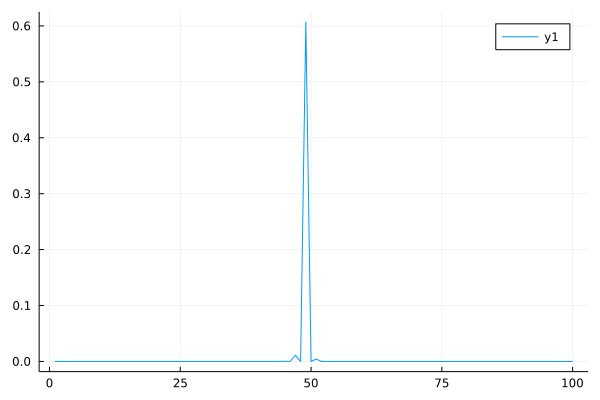

In [17]:
# Look at eigenvector
plot_inst = plot(1:L, abs.(evecs_list[:,8]).^4 )

#plot!(1:L, abs.(evecs_list[:,2]) ) 

plot_inst

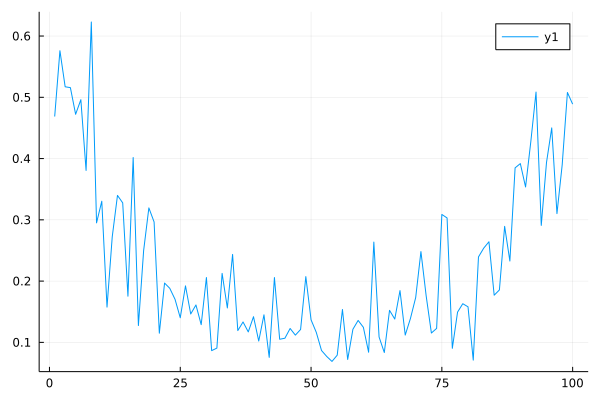

In [18]:
# plot ipr for some eigenstates
include("/Users/mrampp/Github/PKS_Julia_Hackathon/src/observables.jl")
ipr = inverse_participation_ratio(evecs_list)
#ipr
plot_ipr = plot(1:L, ipr )

plot_ipr

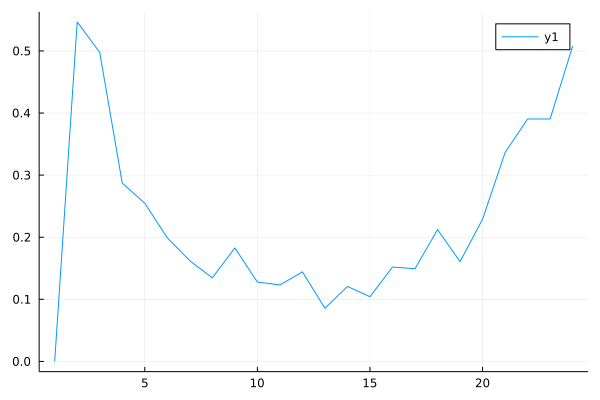

In [19]:
# energy resolved ipr
bins = LinRange(-1.6,1.6,25)
en_resolved_ipr = binned_average(evals_list, ipr, bins )
#en_resolved_ipr
plot_en_resolved_ipr = plot(1:length(bins)-1, en_resolved_ipr)

display(plot_en_resolved_ipr)

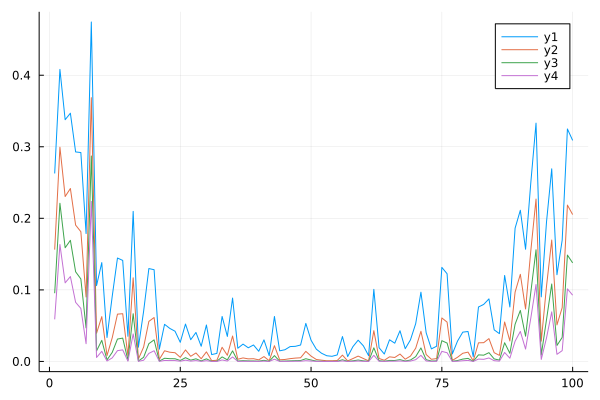

In [20]:
# plot further wavefunction moments
mom1 = wavefunction_moment(3,evecs_list)
plot_moments = plot(1:L, mom1 )
for q in 4:6
    mom_new = wavefunction_moment(q,evecs_list)
    plot!(1:L,mom_new)
end

plot_moments